## Importing Libraries

In [1]:
import os
import torch
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


## Loading Data

In [3]:
df = pd.read_csv('/content/drive/MyDrive/data-training.csv')
df.head(10)

,askRate0,askRate1,askRate2,askRate3,askRate4,askRate5,askRate6,askRate7,askRate8,askRate9,askRate10,askRate11,askRate12,askRate13,askRate14,askSize0,askSize1,askSize2,askSize3,askSize4,askSize5,askSize6,askSize7,askSize8,askSize9,askSize10,askSize11,askSize12,askSize13,askSize14,bidRate0,bidRate1,bidRate2,bidRate3,bidRate4,bidRate5,bidRate6,bidRate7,bidRate8,bidRate9,bidRate10,bidRate11,bidRate12,bidRate13,bidRate14,bidSize0,bidSize1,bidSize2,bidSize3,bidSize4,bidSize5,bidSize6,bidSize7,bidSize8,bidSize9,bidSize10,bidSize11,bidSize12,bidSize13,bidSize14,y
0,1619.5,1620.0,1621.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,10.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1615.0,1614.0,1613.0,1612.0,1611.0,1610.0,1607.0,1606.0,1605.0,1604.0,1603.0,1602.0,1601.5,1601.0,1600.0,7.0,10.0,1.0,10.0,20.0,3.0,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5
1,1619.5,1620.0,1621.0,1621.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,10.0,24.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1615.0,1614.0,1613.0,1612.0,1611.0,1610.0,1607.0,1606.0,1605.0,1604.0,1603.0,1602.0,1601.5,1601.0,1600.0,7.0,10.0,1.0,10.0,20.0,3.0,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5
2,1619.5,1620.0,1621.0,1621.5,1622.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,10.0,24.0,5.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1615.0,1614.0,1613.0,1612.0,1611.0,1610.0,1607.0,1606.0,1605.0,1604.0,1603.0,1602.0,1601.5,1601.0,1600.0,7.0,10.0,1.0,10.0,20.0,3.0,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5
3,1619.5,1620.0,1621.0,1621.5,1622.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,10.0,24.0,5.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1615.0,1614.0,1613.0,1612.0,1611.0,1610.0,1607.0,1606.0,1605.0,1604.0,1603.0,1602.0,1601.5,1601.0,1600.0,7.0,10.0,1.0,10.0,20.0,3.0,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5
4,1619.5,1620.0,1621.0,1621.5,1622.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,10.0,24.0,5.0,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1615.0,1614.0,1613.0,1612.0,1611.0,1610.0,1607.0,1606.0,1605.0,1604.0,1603.0,1602.0,1601.5,1601.0,1600.0,7.0,10.0,1.0,10.0,20.0,3.0,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5
5,1619.5,1620.0,1621.0,1621.5,1622.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,10.0,24.0,5.0,152.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1615.0,1614.0,1613.0,1612.0,1611.0,1610.0,1607.0,1606.0,1605.0,1604.0,1603.0,1602.0,1601.5,1601.0,1600.0,7.0,10.0,1.0,10.0,20.0,3.0,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5
6,1619.5,1620.0,1621.0,1621.5,1622.0,1623.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,10.0,24.0,5.0,152.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1615.0,1614.0,1613.0,1612.0,1611.0,1610.0,1607.0,1606.0,1605.0,1604.0,1603.0,1602.0,1601.5,1601.0,1600.0,7.0,10.0,1.0,10.0,20.0,3.0,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5
7,1619.5,1620.0,1621.0,1621.5,1622.0,1623.0,1623.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,10.0,24.0,5.0,152.0,10.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1615.0,1614.0,1613.0,1612.0,1611.0,1610.0,1607.0,1606.0,1605.0,1604.0,1603.0,1602.0,1601.5,1601.0,1600.0,7.0,10.0,1.0,10.0,20.0,3.0,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5
8,1619.5,1620.0,1621.0,1621.5,1622.0,1623.0,1623.5,1624.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,10.0,24.0,5.0,152.0,10.0,2.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1615.0,1614.0,1613.0,1612.0,1611.0,1610.0,1607.0,1606.0,1605.0,1604.0,1603.0,1602.0,1601.5,1601.0,1600.0,7.0,10.0,1.0,10.0,20.0,3.0,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5
9,1619.5,1620.0,1621.0,1621.5,1622.0,1623.0,1623.5,1624.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,10.0,24.0,5.0,152.0,10.0,2.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1615.0,1614.0,1613.0,1612.0,1611.0,1610.0,1607.0,1606.0,1605.0,1604.0,1603.0,1602.0,1601.5,1601.0,1600.0,7.0,10.0,1.0,10.0,20.0,3.0,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5


In [4]:
df.tail(10)

,askRate0,askRate1,askRate2,askRate3,askRate4,askRate5,askRate6,askRate7,askRate8,askRate9,askRate10,askRate11,askRate12,askRate13,askRate14,askSize0,askSize1,askSize2,askSize3,askSize4,askSize5,askSize6,askSize7,askSize8,askSize9,askSize10,askSize11,askSize12,askSize13,askSize14,bidRate0,bidRate1,bidRate2,bidRate3,bidRate4,bidRate5,bidRate6,bidRate7,bidRate8,bidRate9,bidRate10,bidRate11,bidRate12,bidRate13,bidRate14,bidSize0,bidSize1,bidSize2,bidSize3,bidSize4,bidSize5,bidSize6,bidSize7,bidSize8,bidSize9,bidSize10,bidSize11,bidSize12,bidSize13,bidSize14,y
2999989,1583.5,1584.0,1584.5,1585.0,1585.5,1586.0,1586.5,1587.0,1587.5,1588.0,1588.5,1589.0,1589.5,1590.0,1591.0,5.0,12.0,10.0,17.0,8.0,9.0,7.0,8.0,20.0,9.0,6.0,2.0,43.0,12.0,1.0,1583.0,1582.5,1582.0,1581.5,1581.0,1580.5,1580.0,1579.5,1579.0,1578.5,1578.0,1577.5,1577.0,1576.0,1575.5,4.0,15.0,10.0,10.0,36.0,20.0,64.0,13.0,28.0,44.0,95.0,2.0,3.0,26.0,3.0,0.5
2999990,1583.5,1584.0,1584.5,1585.0,1585.5,1586.0,1586.5,1587.0,1587.5,1588.0,1588.5,1589.0,1589.5,1590.0,1591.0,5.0,12.0,10.0,17.0,8.0,9.0,7.0,8.0,20.0,9.0,6.0,2.0,43.0,12.0,1.0,1583.0,1582.5,1582.0,1581.5,1581.0,1580.5,1580.0,1579.5,1579.0,1578.5,1578.0,1577.5,1577.0,1576.0,1575.5,3.0,15.0,10.0,10.0,36.0,20.0,64.0,13.0,28.0,44.0,95.0,2.0,3.0,26.0,3.0,0.5
2999991,1583.5,1584.0,1584.5,1585.0,1585.5,1586.0,1586.5,1587.0,1587.5,1588.0,1588.5,1589.0,1589.5,1590.0,1591.0,5.0,12.0,10.0,17.0,8.0,9.0,7.0,8.0,20.0,9.0,6.0,2.0,43.0,12.0,1.0,1583.0,1582.5,1582.0,1581.5,1581.0,1580.5,1580.0,1579.5,1579.0,1578.5,1578.0,1577.5,1577.0,1576.0,1575.5,4.0,15.0,10.0,10.0,36.0,20.0,64.0,13.0,28.0,44.0,95.0,2.0,3.0,26.0,3.0,0.5
2999992,1583.5,1584.0,1584.5,1585.0,1585.5,1586.0,1586.5,1587.0,1587.5,1588.0,1588.5,1589.0,1589.5,1590.0,1591.0,5.0,12.0,8.0,17.0,8.0,9.0,7.0,8.0,20.0,9.0,6.0,2.0,43.0,12.0,1.0,1583.0,1582.5,1582.0,1581.5,1581.0,1580.5,1580.0,1579.5,1579.0,1578.5,1578.0,1577.5,1577.0,1576.0,1575.5,4.0,15.0,10.0,10.0,36.0,20.0,64.0,13.0,28.0,44.0,95.0,2.0,3.0,26.0,3.0,0.5
2999993,1583.5,1584.0,1584.5,1585.0,1585.5,1586.0,1586.5,1587.0,1587.5,1588.0,1588.5,1589.0,1589.5,1590.0,1591.0,7.0,12.0,8.0,17.0,8.0,9.0,7.0,8.0,20.0,9.0,6.0,2.0,43.0,12.0,1.0,1583.0,1582.5,1582.0,1581.5,1581.0,1580.5,1580.0,1579.5,1579.0,1578.5,1578.0,1577.5,1577.0,1576.0,1575.5,4.0,15.0,10.0,10.0,36.0,20.0,64.0,13.0,28.0,44.0,95.0,2.0,3.0,26.0,3.0,0.5
2999994,1583.5,1584.0,1584.5,1585.0,1585.5,1586.0,1586.5,1587.0,1587.5,1588.0,1588.5,1589.0,1589.5,1590.0,1591.0,8.0,11.0,8.0,17.0,8.0,9.0,7.0,8.0,20.0,9.0,6.0,2.0,43.0,12.0,1.0,1583.0,1582.5,1582.0,1581.5,1581.0,1580.5,1580.0,1579.5,1579.0,1578.5,1578.0,1577.5,1577.0,1576.0,1575.5,4.0,15.0,10.0,10.0,36.0,20.0,64.0,13.0,28.0,44.0,95.0,2.0,3.0,26.0,3.0,0.5
2999995,1583.5,1584.0,1584.5,1585.0,1585.5,1586.0,1586.5,1587.0,1587.5,1588.0,1588.5,1589.0,1589.5,1590.0,1591.0,9.0,10.0,8.0,17.0,8.0,9.0,7.0,8.0,20.0,9.0,6.0,2.0,43.0,12.0,1.0,1583.0,1582.5,1582.0,1581.5,1581.0,1580.5,1580.0,1579.5,1579.0,1578.5,1578.0,1577.5,1577.0,1576.0,1575.5,4.0,15.0,10.0,10.0,36.0,20.0,64.0,13.0,28.0,44.0,95.0,2.0,3.0,26.0,3.0,0.5
2999996,1583.5,1584.0,1584.5,1585.0,1585.5,1586.0,1586.5,1587.0,1587.5,1588.0,1588.5,1589.0,1589.5,1590.0,1591.0,10.0,9.0,8.0,17.0,8.0,9.0,7.0,8.0,20.0,9.0,6.0,2.0,43.0,12.0,1.0,1583.0,1582.5,1582.0,1581.5,1581.0,1580.5,1580.0,1579.5,1579.0,1578.5,1578.0,1577.5,1577.0,1576.0,1575.5,4.0,15.0,10.0,10.0,36.0,20.0,64.0,13.0,28.0,44.0,95.0,2.0,3.0,26.0,3.0,0.5
2999997,1583.5,1584.0,1584.5,1585.0,1585.5,1586.0,1586.5,1587.0,1587.5,1588.0,1588.5,1589.0,1589.5,1590.0,1591.0,11.0,8.0,8.0,17.0,8.0,9.0,7.0,8.0,20.0,9.0,6.0,2.0,43.0,12.0,1.0,1583.0,1582.5,1582.0,1581.5,1581.0,1580.5,1580.0,1579.5,1579.0,1578.5,1578.0,1577.5,1577.0,1576.0,1575.5,4.0,15.0,10.0,10.0,36.0,20.0,64.0,13.0,28.0,44.0,95.0,2.0,3.0,26.0,3.0,0.5
2999998,1583.5,1584.0,1584.5,1585.0,1585.5,1586.0,1586.5,1587.0,1587.5,1588.0,1588.5,1589.0,1589.5,1590.0,1591.0,11.0,8.0,8.0,17.0,8.0,9.0,7.0,8.0,20.0,9.0,6.0,2.0,43.0,12.0,1.0,1583.0,1582.5,1582.0,1581.5,1581.0

In [5]:
df.info(verbose = True, null_counts= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999999 entries, 0 to 2999998
Data columns (total 61 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   askRate0   2999999 non-null  float64
 1   askRate1   2999963 non-null  float64
 2   askRate2   2999935 non-null  float64
 3   askRate3   2999902 non-null  float64
 4   askRate4   2999861 non-null  float64
 5   askRate5   2999826 non-null  float64
 6   askRate6   2999792 non-null  float64
 7   askRate7   2999761 non-null  float64
 8   askRate8   2999734 non-null  float64
 9   askRate9   2999708 non-null  float64
 10  askRate10  2999674 non-null  float64
 11  askRate11  2999639 non-null  float64
 12  askRate12  2999605 non-null  float64
 13  askRate13  2999570 non-null  float64
 14  askRate14  2999548 non-null  float64
 15  askSize0   2999999 non-null  float64
 16  askSize1   2999963 non-null  float64
 17  askSize2   2999935 non-null  float64
 18  askSize3   2999902 non-null  float64
 19  

## Feature Engineering

In [6]:
df.isnull().sum()

askRate0       0
askRate1      36
askRate2      64
askRate3      97
askRate4     138
            ... 
bidSize11      0
bidSize12      0
bidSize13      0
bidSize14      0
y              0
Length: 61, dtype: int64

In [7]:
# Drop missing values
#df = df.dropna().reset_index(drop = True)
df = df.fillna(0)
df.head(10)

,askRate0,askRate1,askRate2,askRate3,askRate4,askRate5,askRate6,askRate7,askRate8,askRate9,askRate10,askRate11,askRate12,askRate13,askRate14,askSize0,askSize1,askSize2,askSize3,askSize4,askSize5,askSize6,askSize7,askSize8,askSize9,askSize10,askSize11,askSize12,askSize13,askSize14,bidRate0,bidRate1,bidRate2,bidRate3,bidRate4,bidRate5,bidRate6,bidRate7,bidRate8,bidRate9,bidRate10,bidRate11,bidRate12,bidRate13,bidRate14,bidSize0,bidSize1,bidSize2,bidSize3,bidSize4,bidSize5,bidSize6,bidSize7,bidSize8,bidSize9,bidSize10,bidSize11,bidSize12,bidSize13,bidSize14,y
0,1619.5,1620.0,1621.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1615.0,1614.0,1613.0,1612.0,1611.0,1610.0,1607.0,1606.0,1605.0,1604.0,1603.0,1602.0,1601.5,1601.0,1600.0,7.0,10.0,1.0,10.0,20.0,3.0,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5
1,1619.5,1620.0,1621.0,1621.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,24.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1615.0,1614.0,1613.0,1612.0,1611.0,1610.0,1607.0,1606.0,1605.0,1604.0,1603.0,1602.0,1601.5,1601.0,1600.0,7.0,10.0,1.0,10.0,20.0,3.0,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5
2,1619.5,1620.0,1621.0,1621.5,1622.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,24.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1615.0,1614.0,1613.0,1612.0,1611.0,1610.0,1607.0,1606.0,1605.0,1604.0,1603.0,1602.0,1601.5,1601.0,1600.0,7.0,10.0,1.0,10.0,20.0,3.0,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5
3,1619.5,1620.0,1621.0,1621.5,1622.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,24.0,5.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1615.0,1614.0,1613.0,1612.0,1611.0,1610.0,1607.0,1606.0,1605.0,1604.0,1603.0,1602.0,1601.5,1601.0,1600.0,7.0,10.0,1.0,10.0,20.0,3.0,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5
4,1619.5,1620.0,1621.0,1621.5,1622.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,24.0,5.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1615.0,1614.0,1613.0,1612.0,1611.0,1610.0,1607.0,1606.0,1605.0,1604.0,1603.0,1602.0,1601.5,1601.0,1600.0,7.0,10.0,1.0,10.0,20.0,3.0,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5
5,1619.5,1620.0,1621.0,1621.5,1622.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,24.0,5.0,152.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1615.0,1614.0,1613.0,1612.0,1611.0,1610.0,1607.0,1606.0,1605.0,1604.0,1603.0,1602.0,1601.5,1601.0,1600.0,7.0,10.0,1.0,10.0,20.0,3.0,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5
6,1619.5,1620.0,1621.0,1621.5,1622.0,1623.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,24.0,5.0,152.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1615.0,1614.0,1613.0,1612.0,1611.0,1610.0,1607.0,1606.0,1605.0,1604.0,1603.0,1602.0,1601.5,1601.0,1600.0,7.0,10.0,1.0,10.0,20.0,3.0,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5
7,1619.5,1620.0,1621.0,1621.5,1622.0,1623.0,1623.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,24.0,5.0,152.0,10.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1615.0,1614.0,1613.0,1612.0,1611.0,1610.0,1607.0,1606.0,1605.0,1604.0,1603.0,1602.0,1601.5,1601.0,1600.0,7.0,10.0,1.0,10.0,20.0,3.0,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5
8,1619.5,1620.0,1621.0,1621.5,1622.0,1623.0,1623.5,1624.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,24.0,5.0,152.0,10.0,2.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1615.0,1614.0,1613.0,1612.0,1611.0,1610.0,1607.0,1606.0,1605.0,1604.0,1603.0,1602.0,1601.5,1601.0,1600.0,7.0,10.0,1.0,10.0,20.0,3.0,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5
9,1619.5,1620.0,1621.0,1621.5,1622.0,1623.0,1623.5,1624.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,24.0,5.0,152.0,10.0,2.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1615.0,1614.0,1613.0,1612.0,1611.0,1610.0,1607.0,1606.0,1605.0,1604.0,1603.0,1602.0,1601.5,1601.0,1600.0,7.0,10.0,1.0,10.0,20.0,3.0,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5


In [8]:
df['y'].unique()

array([-0.5 , -0.25,  0.  , -1.  , -1.25, -0.75, -1.5 ,  0.75,  0.5 ,
        0.25,  1.75,  1.  ,  1.5 ,  1.25,  2.  , -1.75,  2.25, -3.  ,
       -2.  , -2.5 , -2.25,  3.  ,  3.25,  3.5 ,  2.75,  2.5 , -3.5 ,
       -2.75, -3.25, -3.75, -4.  , -4.25, -4.75, -4.5 , -5.  ,  4.75,
        5.  ,  3.75,  4.  ,  4.5 ,  4.25])

In [9]:
df['price'] = df['y'].cumsum()
df.drop(['y'], axis = 1, inplace = True)
df.head(10)

,askRate0,askRate1,askRate2,askRate3,askRate4,askRate5,askRate6,askRate7,askRate8,askRate9,askRate10,askRate11,askRate12,askRate13,askRate14,askSize0,askSize1,askSize2,askSize3,askSize4,askSize5,askSize6,askSize7,askSize8,askSize9,askSize10,askSize11,askSize12,askSize13,askSize14,bidRate0,bidRate1,bidRate2,bidRate3,bidRate4,bidRate5,bidRate6,bidRate7,bidRate8,bidRate9,bidRate10,bidRate11,bidRate12,bidRate13,bidRate14,bidSize0,bidSize1,bidSize2,bidSize3,bidSize4,bidSize5,bidSize6,bidSize7,bidSize8,bidSize9,bidSize10,bidSize11,bidSize12,bidSize13,bidSize14,price
0,1619.5,1620.0,1621.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1615.0,1614.0,1613.0,1612.0,1611.0,1610.0,1607.0,1606.0,1605.0,1604.0,1603.0,1602.0,1601.5,1601.0,1600.0,7.0,10.0,1.0,10.0,20.0,3.0,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5
1,1619.5,1620.0,1621.0,1621.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,24.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1615.0,1614.0,1613.0,1612.0,1611.0,1610.0,1607.0,1606.0,1605.0,1604.0,1603.0,1602.0,1601.5,1601.0,1600.0,7.0,10.0,1.0,10.0,20.0,3.0,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-1.0
2,1619.5,1620.0,1621.0,1621.5,1622.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,24.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1615.0,1614.0,1613.0,1612.0,1611.0,1610.0,1607.0,1606.0,1605.0,1604.0,1603.0,1602.0,1601.5,1601.0,1600.0,7.0,10.0,1.0,10.0,20.0,3.0,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-1.5
3,1619.5,1620.0,1621.0,1621.5,1622.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,24.0,5.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1615.0,1614.0,1613.0,1612.0,1611.0,1610.0,1607.0,1606.0,1605.0,1604.0,1603.0,1602.0,1601.5,1601.0,1600.0,7.0,10.0,1.0,10.0,20.0,3.0,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-2.0
4,1619.5,1620.0,1621.0,1621.5,1622.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,24.0,5.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1615.0,1614.0,1613.0,1612.0,1611.0,1610.0,1607.0,1606.0,1605.0,1604.0,1603.0,1602.0,1601.5,1601.0,1600.0,7.0,10.0,1.0,10.0,20.0,3.0,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-2.5
5,1619.5,1620.0,1621.0,1621.5,1622.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,24.0,5.0,152.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1615.0,1614.0,1613.0,1612.0,1611.0,1610.0,1607.0,1606.0,1605.0,1604.0,1603.0,1602.0,1601.5,1601.0,1600.0,7.0,10.0,1.0,10.0,20.0,3.0,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-3.0
6,1619.5,1620.0,1621.0,1621.5,1622.0,1623.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,24.0,5.0,152.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1615.0,1614.0,1613.0,1612.0,1611.0,1610.0,1607.0,1606.0,1605.0,1604.0,1603.0,1602.0,1601.5,1601.0,1600.0,7.0,10.0,1.0,10.0,20.0,3.0,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-3.5
7,1619.5,1620.0,1621.0,1621.5,1622.0,1623.0,1623.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,24.0,5.0,152.0,10.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1615.0,1614.0,1613.0,1612.0,1611.0,1610.0,1607.0,1606.0,1605.0,1604.0,1603.0,1602.0,1601.5,1601.0,1600.0,7.0,10.0,1.0,10.0,20.0,3.0,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-4.0
8,1619.5,1620.0,1621.0,1621.5,1622.0,1623.0,1623.5,1624.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,24.0,5.0,152.0,10.0,2.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1615.0,1614.0,1613.0,1612.0,1611.0,1610.0,1607.0,1606.0,1605.0,1604.0,1603.0,1602.0,1601.5,1601.0,1600.0,7.0,10.0,1.0,10.0,20.0,3.0,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-4.5
9,1619.5,1620.0,1621.0,1621.5,1622.0,1623.0,1623.5,1624.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,24.0,5.0,152.0,10.0,2.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1615.0,1614.0,1613.0,1612.0,1611.0,1610.0,1607.0,1606.0,1605.0,1604.0,1603.0,1602.0,1601.5,1601.0,1600.0,7.0,10.0,1.0,10.0,20.0,3.0,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-5.0


In [10]:
len(df)

2999999

In [11]:
train_rate = 0.6
val_rate = 0.2
int(len(df)*train_rate)

1799999

In [12]:
df_copy = df.iloc[:1000000].copy(deep = True)

In [13]:
# train, val, test split
df_train = df_copy.iloc[:int(len(df_copy)*train_rate)].copy(deep = True)
df_val = df_copy.iloc[int(len(df_copy)*train_rate):int(len(df_copy)*train_rate) + int(len(df_copy)*val_rate)].copy(deep = True)
df_test = df_copy.iloc[int(len(df_copy)*train_rate) + int(len(df_copy)*val_rate):].copy(deep = True)
print(df_train.shape)
print(df_val.shape)
print(df_test.shape)

(600000, 61)
(200000, 61)
(200000, 61)


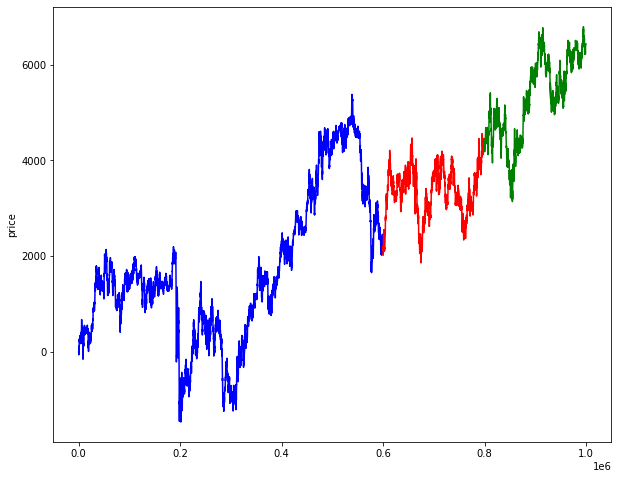

In [14]:
plt.figure(figsize = (10,8))
sns.lineplot(data = df_train['price'], color = 'blue')
sns.lineplot(data = df_val['price'], color = 'red' )
sns.lineplot(data = df_test['price'], color = 'green' )

## Making Datasets

In [15]:
# scale the data
from sklearn.preprocessing import MinMaxScaler
mx = MinMaxScaler()
train = mx.fit_transform(df_train)
val = mx.transform(df_val)
test = mx.transform(df_test)

In [16]:
# making datasets
def make_dataset(data, lookback):
  X = []
  y = []
  for i in range(lookback, len(data)):
    sample  = data[i - lookback:i,:]
    target = data[i,-1]
    X.append(sample)
    y.append(target)
  X = np.asarray(X)
  y = np.asarray(y)  
  return (X, y)
X_train ,y_train = make_dataset(train, 10) 
X_val ,y_val = make_dataset(val, 10)  
X_test ,y_test = make_dataset(test, 10) 
 

In [17]:
y_train = y_train.reshape((-1,1)) 
y_val = y_val.reshape((-1,1)) 
y_test = y_test.reshape((-1,1))

In [18]:
print(X_train.shape)
print(y_train.shape)

(599990, 10, 61)
(599990, 1)


In [19]:
# Data loader
from torch.utils.data import TensorDataset, DataLoader
batch_size = 64
train_data = TensorDataset(torch.from_numpy(X_train), torch.from_numpy(y_train))
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size, drop_last=True)
for i, sample in enumerate(train_loader):
  print(sample[0].size())
  break

torch.Size([64, 10, 61])


## Modeling

In [20]:
import torch.nn as nn
class GRUNet(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, n_layers):
        super(GRUNet, self).__init__()
        self.hidden_dim = hidden_dim
        self.n_layers = n_layers
        
        self.gru = nn.GRU(input_dim, hidden_dim, n_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)
        self.relu = nn.ReLU()
        
    def forward(self, x, h):
        out, h = self.gru(x, h)
        out = self.fc(self.relu(out[:,-1]))
        return out, h
    
    def init_hidden(self, batch_size):
        weight = next(self.parameters()).data
        hidden = weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device)
        return hidden       

In [21]:
import time
def train(train_loader, learn_rate, hidden_dim=32, EPOCHS=10, model_type="GRU"):
    
    # Setting common hyperparameters
    input_dim = next(iter(train_loader))[0].shape[2]
    output_dim = 1
    n_layers = 2
    # Instantiating the models
    if model_type == "GRU":
        model = GRUNet(input_dim, hidden_dim, output_dim, n_layers)
    else:
        model = LSTMNet(input_dim, hidden_dim, output_dim, n_layers)
    model.to(device)
    
    # Defining loss function and optimizer
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learn_rate)
    
    model.train()
    print("Starting Training of {} model".format(model_type))
    epoch_times = []
    # Start training loop
    for epoch in range(1,EPOCHS+1):
        start_time = time.clock()
        h = model.init_hidden(batch_size)
        avg_loss = 0.
        counter = 0
        for x, label in train_loader:
            counter += 1
            if model_type == "GRU":
                h = h.data
            else:
                h = tuple([e.data for e in h])
            model.zero_grad()
            
            out, h = model(x.to(device).float(), h)
            loss = criterion(out, label.to(device).float())
            loss.backward()
            optimizer.step()
            avg_loss += loss.item()
            if counter%200 == 0:
                print("Epoch {}......Step: {}/{}....... Average Loss for Epoch: {}".format(epoch, counter, len(train_loader), avg_loss/counter))
        current_time = time.clock()
        print("Epoch {}/{} Done, Total Loss: {}".format(epoch, EPOCHS, avg_loss/len(train_loader)))
        print("Total Time Elapsed: {} seconds".format(str(current_time-start_time)))
        epoch_times.append(current_time-start_time)
    print("Total Training Time: {} seconds".format(str(sum(epoch_times))))
    return model

In [22]:
lr = 0.001
gru_model = train(train_loader, lr, model_type="GRU")

Starting Training of GRU model


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


Epoch 1......Step: 200/9374....... Average Loss for Epoch: 0.024227011559705715
Epoch 1......Step: 400/9374....... Average Loss for Epoch: 0.012524862050340743
Epoch 1......Step: 600/9374....... Average Loss for Epoch: 0.00858826333079681
Epoch 1......Step: 800/9374....... Average Loss for Epoch: 0.006598090524130384
Epoch 1......Step: 1000/9374....... Average Loss for Epoch: 0.005382738184416667
Epoch 1......Step: 1200/9374....... Average Loss for Epoch: 0.004550014570025572
Epoch 1......Step: 1400/9374....... Average Loss for Epoch: 0.003936433686961079
Epoch 1......Step: 1600/9374....... Average Loss for Epoch: 0.003460646916311134
Epoch 1......Step: 1800/9374....... Average Loss for Epoch: 0.0030833635988786533
Epoch 1......Step: 2000/9374....... Average Loss for Epoch: 0.0027796882065704268
Epoch 1......Step: 2200/9374....... Average Loss for Epoch: 0.0025296876873409763
Epoch 1......Step: 2400/9374....... Average Loss for Epoch: 0.002321360800315612
Epoch 1......Step: 2600/9374..

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


Epoch 1/10 Done, Total Loss: 0.0006103032662731723
Total Time Elapsed: 28.608348000000007 seconds
Epoch 2......Step: 200/9374....... Average Loss for Epoch: 1.4815921314266234e-05
Epoch 2......Step: 400/9374....... Average Loss for Epoch: 2.067936273306259e-05
Epoch 2......Step: 600/9374....... Average Loss for Epoch: 1.579212781715948e-05
Epoch 2......Step: 800/9374....... Average Loss for Epoch: 1.4983005947897254e-05
Epoch 2......Step: 1000/9374....... Average Loss for Epoch: 1.632895913644461e-05
Epoch 2......Step: 1200/9374....... Average Loss for Epoch: 1.5273707551415326e-05
Epoch 2......Step: 1400/9374....... Average Loss for Epoch: 1.477774156938949e-05
Epoch 2......Step: 1600/9374....... Average Loss for Epoch: 1.4624055397938208e-05
Epoch 2......Step: 1800/9374....... Average Loss for Epoch: 1.406985371769704e-05
Epoch 2......Step: 2000/9374....... Average Loss for Epoch: 1.4073328743592128e-05
Epoch 2......Step: 2200/9374....... Average Loss for Epoch: 1.4502668316331644e-0

In [23]:
batch_size = 64
train_data = TensorDataset(torch.from_numpy(X_train), torch.from_numpy(y_train))
train_loader = DataLoader(train_data, shuffle = False, batch_size=batch_size)
val_data = TensorDataset(torch.from_numpy(X_val), torch.from_numpy(y_val))
val_loader = DataLoader(val_data, shuffle = False, batch_size=batch_size)
test_data = TensorDataset(torch.from_numpy(X_test), torch.from_numpy(y_test))
test_loader = DataLoader(test_data, shuffle=False, batch_size=batch_size)
for i, sample in enumerate(train_loader):
  print(sample[0].size())
  break

torch.Size([64, 10, 61])


In [24]:
def evaluate(model, test_loader):
    model.eval()
    outputs = []
    targets = []
    start_time = time.clock()
    for i, data in enumerate(test_loader):
        inp = data[0]
        labs = data[1]
        h = model.init_hidden(inp.shape[0])
        out, h = model(inp.to(device).float(), h)
        outputs.append(out.cpu().detach().numpy().reshape(-1))
        targets.append(labs.numpy().reshape(-1))
    print("Evaluation Time: {}".format(str(time.clock()-start_time)))
    sMAPE = 0
    for i in range(len(outputs)):
        sMAPE += np.mean(abs(outputs[i]-targets[i])/(targets[i]+outputs[i])/2)/len(outputs)
    print("sMAPE: {}%".format(sMAPE*100))
    return np.hstack(outputs), np.hstack(targets), sMAPE

In [25]:
y_train_pred, y_train, _ = evaluate(gru_model, train_loader)
y_test_pred, y_test, _ = evaluate(gru_model, test_loader)
y_val_pred, y_val, _ = evaluate(gru_model, val_loader)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  del sys.path[0]


Evaluation Time: 10.935009000000036
sMAPE: 0.11686672793446648%
Evaluation Time: 3.6623559999999884
sMAPE: 0.164511262962994%
Evaluation Time: 3.6386720000000423
sMAPE: 0.08338540059837543%


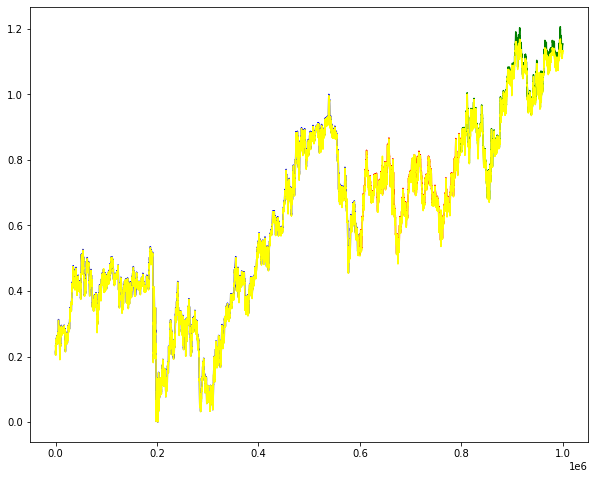

In [26]:
plt.figure(figsize = (10,8))
plt.plot(range(y_train.shape[0]), y_train, color = 'blue')
plt.plot(range(y_train.shape[0]), y_train_pred, color = 'yellow')
plt.plot(range(y_train.shape[0],y_train.shape[0]+y_val.shape[0]), y_val, color = 'red')
plt.plot(range(y_train.shape[0],y_train.shape[0]+y_val.shape[0]), y_val_pred, color = 'yellow')
plt.plot(range(y_train.shape[0]+y_val.shape[0], y_train.shape[0]+y_val.shape[0]+y_test.shape[0]), y_test, color = 'green')
plt.plot(range(y_train.shape[0]+y_val.shape[0], y_train.shape[0]+y_val.shape[0]+y_test.shape[0]), y_test_pred, color = 'yellow')

In [27]:
from sklearn.metrics import r2_score
print(r2_score(y_test, y_test_pred))

0.9939620740871318
